#  Final Project Submission: Microsoft Movie Studios Viability Analysis 
__(Phase 1)__

***
- Student Name: Tenicka Norwood
- Program Pace: self paced 
- Scheduled Project Review time: 10/26/2022 
- Instructor name: Joe Comeaux
- Blog post Url: 


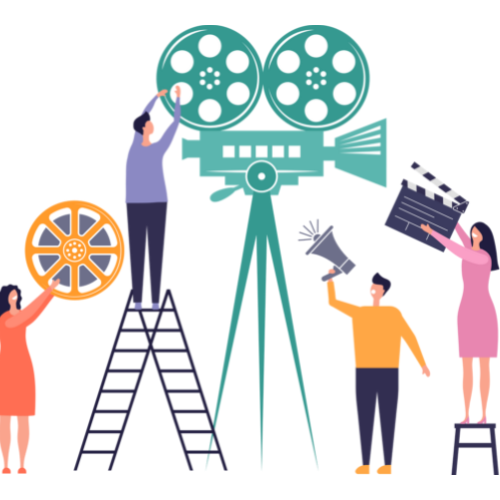
Photo by: Crownlab on [Canva](http://www.canva.com)

# Business Understanding
***

Analysts at Business Wire estimate that the global film and video market will reach $410.6 billion by 2030. Microsoft is uniquely situated to leverage its existing technology holidings to redefine the film industry by crafting a one stop shop platform which manages the entire process from preproduction to filming to distribution. Microsoft's executives are in search of actionable ways to ensure successful movies are produced as they launch a new movie studio that is well supported from its onset. 

As a new recruit for the newly formed performance business analysis team at Microsoft, I have been tasked with crafting a plan to make the company's decision to diversify their holdings to include creating original video content at their new movie studio that is both well supported with data and profitable.  The guiding question that I have been tasked to answer through data analysis is: Which types of films historically are the most successful at the box office? 

How do we prevent headlines like:

> __*‘Fantastic Beasts’ turns ‘The Secrets of Dumbledore’ into too much of a snore*__ - Review by Brian Lowry, CNN April 15, 2022

From negatively impacting our bottom line? 

With this in mind, I am working on the following questions:

* When is the best time of year to release a movie?
* Which director makes the most profitable movies?
* Which genres of movies make the most profit at the box office?

# Data Understanding
***

The datasets used in this project are from the following sources:
* [IMDB](https://www.imdb.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [The Numbers](https://www.the-numbers.com/)

There is a variety of information available on the web that can help as I try to identify the tools Microsoft will need to leverage to be a viable contender in the original video content space and compete as a new Movie studio within their brand. This data includes information on movie genres, titles, runtimes, production costs, gross box office revenue both foreign and domestic and release dates. With this data I will drill down for insights related to the impact that time of year, performer and genres have on success of movies at the box office.

# Method 
***
This project will explore data related to current trends in the movie industry. This exploration will include:
* __Importing Relevant libraries__
    - Access code from different modules
* __Data Preparation__
    - Access databases and dataframes useful to this project
    - Investigate data shape and datatype information
    - Drop or impute null values
    - Reduce complexity (ex. join dataframes where necessary, remove or replace missing values, address duplicates data)
* __Addressing Question 1 through Exploratory Data Analysis (EDA)__ 
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* __Addression Question 2 through EDA__
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* __Addressing Question 3 through EDA__
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* __Discussion & Recommendations__
    - Discuss findings
    - Identify next steps based on findings

# Data Preparation
***

## Import libraries and Visualization Packages
Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement.  The main libraries that will be used within this project include:
- sqlite3: a library that provides a SQL interface that allows accessing and manipulating SQL database
- pandas: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
- numpy: a key library that brings the computationaly power of languages like C to Python
- matplotlib: a comprehensive visualization library
- seaborn: a data visualization library based on matplotlib 

In [1]:
# Import libraries and visualization packages
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [2]:
# Create a connection to the imdb database
conn = sqlite3.connect('zippedData/im.db/im.db')

##  Accessing databases and dataframes
***
Review data shape and statistics. IMDB data is in a database and has multiple tables which have a column called movie_id that allows them to be combined. These tables include genres, primary titles, and runtimes, but do not contain financial information.  Data from The Numbers and Box Office Mojo contain financial information.

In [3]:
# Read in the data
# Read Data from Box office Mojo
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Select All from Movie Basics
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)

#Explore data from Movie Ratings Table by Selecting all fields
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
#movie_ratings.head()

# Select All from Directors
movie_directors = pd.read_sql("SELECT * FROM directors", conn)

# Select ALL from Persons
movie_persons = pd.read_sql("SELECT * FROM persons", conn)

# Read Data from The Movie Databases
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Read in movie budget data from The Numbers 
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')



In [4]:
# Preview Box Office Mojo Dataframe
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [5]:
# Remove Future Projects From IMDB Movie Basics
movie_basics = movie_basics[movie_basics['start_year'] < 2022]

In [6]:
# Display First Five Rows of the movie_basics table for Movies with Release dates prior to this year
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [7]:
# Information about the shape, datatypes and size of movie_basics dataframe 
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146101 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146101 non-null  object 
 1   primary_title    146101 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146101 non-null  int64  
 4   runtime_minutes  114402 non-null  float64
 5   genres           140705 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [8]:
# Preview IMDB directors Table
movie_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [9]:
# Information about the shape, datatypes and size of movie_directors dataframe 
movie_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [10]:
# Address missing data replacing null values with placeholder 
movie_persons.head()
movie_persons["primary_profession"].fillna("Unknown", inplace = True)
movie_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  606648 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [11]:
# Drop columns birth_year and death_year
movie_persons.drop(labels =["birth_year", "death_year"], axis = 1, inplace = True)
movie_persons.head()

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"


In [12]:
# Merge directors and persons dataframes
director_names = pd.merge(left = movie_directors, right = movie_persons, left_on = ["person_id"], 
                          right_on = ["person_id"], how = "inner")
director_names.head()

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,"director,actor,writer"
3,tt0835418,nm0151540,Jay Chandrasekhar,"director,actor,writer"
4,tt0859635,nm0151540,Jay Chandrasekhar,"director,actor,writer"


In [13]:
# Information about the shape, datatypes and size of movie_basics dataframe 
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146101 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146101 non-null  object 
 1   primary_title    146101 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146101 non-null  int64  
 4   runtime_minutes  114402 non-null  float64
 5   genres           140705 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [14]:
# Information about the shape, datatypes and size of director_name dataframe 
director_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291171 entries, 0 to 291170
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movie_id            291171 non-null  object
 1   person_id           291171 non-null  object
 2   primary_name        291171 non-null  object
 3   primary_profession  291171 non-null  object
dtypes: object(4)
memory usage: 11.1+ MB


In [15]:
# Preview The Movie Database Movies Dataframe
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


While there are 146101 rows and 6 columns in the movie basics data. I notice that __three of those rows have missing values__:

- genres
- runtime_minutes
- original_title 

In [16]:
# Remove Unnamed column
tmdb_movies_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

In [17]:
# Print the number of missing values for each column
print("The number of missing rows in the genres column of the movie_basics dataframe is:", 
         len(movie_basics[movie_basics["genres"].isna()]),'.')
print("The number of missing rows in the runtime_minutes column of the movie_basics dataframe is", 
         len(movie_basics[movie_basics["runtime_minutes"].isna()]),'.')
print("The number of missing rows in the original_title colum of the movie_basics dataframe is", 
         len(movie_basics[movie_basics["original_title"].isna()]),'.')

The number of missing rows in the genres column of the movie_basics dataframe is: 5396 .
The number of missing rows in the runtime_minutes column of the movie_basics dataframe is 31699 .
The number of missing rows in the original_title colum of the movie_basics dataframe is 21 .


Since **there are only 21 __(~ 0.01 % of column data)__ rows of missing data** in the original_title column, we can delete these rows without skewing our results. 

In [18]:
# Address Missing values in movie_basics original_title column
movie_basics.dropna(subset =["original_title"], inplace = True)

In [19]:
# Check the shape of the data
movie_basics.shape

(146080, 6)

Now that I deleted the rows that were missing original_title data, I will check to see if the features have changed by using .info().

In [20]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146080 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146080 non-null  object 
 1   primary_title    146080 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146080 non-null  int64  
 4   runtime_minutes  114398 non-null  float64
 5   genres           140703 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


There are 31699 rows of missing data in the runtime_minutes column which means that __only ~78% of movies have a known run time in minutes__ so I will replace the null values with the median value of the runtime_minutes column the dataframe. 

In [21]:
# Address Missing Row values in runtime_minutes column
movie_basics["runtime_minutes"].fillna(movie_basics["runtime_minutes"].median(), inplace = True)

In [22]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146080 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146080 non-null  object 
 1   primary_title    146080 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146080 non-null  int64  
 4   runtime_minutes  146080 non-null  float64
 5   genres           140703 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


Now the movie_basics dataframe has *5 out of 6 columns* without any missing values. This leaves the genres column which has 5408 missing rows of data. While this represents ~3.7% of the data in the column, we do not want to drop this data since it may have an affect on our results.

In [23]:
# Get value counts of movie genres from movie_basics dataframe
movie_basics["genres"].value_counts()
movie_basics["genres"].value_counts().head(20)

Documentary                      32184
Drama                            21484
Comedy                            9177
Horror                            4371
Comedy,Drama                      3519
Thriller                          3046
Action                            2213
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1453
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

In [24]:
# Address missing genres values with placeholder called Missing.
movie_basics["genres"].fillna("Missing", inplace = True)

In [25]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146080 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146080 non-null  object 
 1   primary_title    146080 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146080 non-null  int64  
 4   runtime_minutes  146080 non-null  float64
 5   genres           146080 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


Now the movie_basics dataframe has __6 columns of data__ each with 146080 entries and __no missing data.__

There are several movies listed under two or more genres. For example there 3519 movies that are listed under both Comedy and Drama and 1028 movies listed under three genres (Biography, Documentary and Drama) for the same movie. 

In [26]:
# Address movies listed under multiple genres
movie_basics["multi_genre"] = movie_basics["genres"].str.split(",")
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,multi_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.00,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [27]:
# Explode genre list into new rows
exploded_movie_basics = movie_basics.explode("multi_genre")
exploded_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,multi_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",Drama


In [28]:
# Get the descriptive statistics for averagerating
movie_ratings["averagerating"].describe()

count   73856.00
mean        6.33
std         1.47
min         1.00
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64

In [29]:
# Get the Runtimes of movies by genre
grouped_movies_by_genre = exploded_movie_basics.groupby("multi_genre")
rm_stats = grouped_movies_by_genre["runtime_minutes"].describe()
rm_stats

,count,mean,std,min,25%,50%,75%,max
multi_genre,,,,,,,,
Action,10321.00,97.23,33.40,2.00,87.00,90.00,108.00,2160.00
Adult,25.00,86.80,11.63,57.00,87.00,87.00,87.00,120.00
Adventure,6456.00,85.92,27.55,1.00,75.00,87.00,97.00,540.00
Animation,2793.00,81.81,24.01,1.00,73.00,87.00,90.00,360.00
Biography,8722.00,74.84,32.35,2.00,56.25,79.00,92.00,761.00
Comedy,25309.00,92.70,48.94,1.00,85.00,89.00,100.00,5460.00
Crime,6751.00,94.37,23.76,2.00,85.00,90.00,105.00,605.00
Documentary,51638.00,74.43,241.31,1.00,56.00,77.00,87.00,51420.00
Drama,49876.00,93.07,60.39,2.00,83.00,89.00,102.00,6000.00


In [30]:
# Information about the shape, datatypes and size of dataframe 
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [31]:
# Get movie_ratings statistics
movie_ratings["averagerating"].describe()

count   73856.00
mean        6.33
std         1.47
min         1.00
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64

Now I will remove movie ratings that are rated 6 or lower, since the mean and median values are **6.33** and **6.50** respectively.

In [32]:
# Filter movie_ratings
filtered_movie_ratings = movie_ratings[movie_ratings["averagerating"] <= 6]
filtered_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27968 entries, 3 to 73853
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       27968 non-null  object 
 1   averagerating  27968 non-null  float64
 2   numvotes       27968 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 874.0+ KB


In [33]:
# Preview The Numbers movie_budgets Dataframe
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [34]:
# Convert columns to data time 
tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])
tn_movie_budgets_df["release_year"] = tn_movie_budgets_df['release_date'].dt.year
tn_movie_budgets_df["release_month"] = tn_movie_budgets_df['release_date'].dt.month
tn_movie_budgets_df.drop("release_date", axis = 1, inplace = True)

In [35]:
# Review the shape and datatype information of The numbers movie_budgets dataframe
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
 5   release_year       5782 non-null   int64 
 6   release_month      5782 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 316.3+ KB


In [36]:
# Remove $ and , from Entire Dataframe
tn_movie_budgets_df = tn_movie_budgets_df.replace({"\$":""}, regex = True)
tn_movie_budgets_df = tn_movie_budgets_df.replace({"\,":""}, regex = True)

In [37]:
# Inspect first five rows of movie_budgets dataframe
tn_movie_budgets_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,Avatar,425000000,760507625,2776345279,2009,12
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,3,Dark Phoenix,350000000,42762350,149762350,2019,6
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [38]:
# Replace production_budget, domestic_gross and worldwide_gross with float values in Millions of $
tn_movie_budgets_df["production_budget"] = pd.to_numeric(tn_movie_budgets_df["production_budget"])
tn_movie_budgets_df["domestic_gross"] = pd.to_numeric(tn_movie_budgets_df["domestic_gross"])
tn_movie_budgets_df["worldwide_gross"] = pd.to_numeric(tn_movie_budgets_df["worldwide_gross"])
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
 5   release_year       5782 non-null   int64 
 6   release_month      5782 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 316.3+ KB


In [39]:
# Create a new column called worldwide_profit
tn_movie_budgets_df["worldwide_profit"] = (tn_movie_budgets_df["worldwide_gross"]-tn_movie_budgets_df["production_budget"])

# Create a new column called ROI
tn_movie_budgets_df["ROI"] = tn_movie_budgets_df["worldwide_profit"]/tn_movie_budgets_df["production_budget"] *100
tn_movie_budgets_df.head()
tn_movie_budgets_df = tn_movie_budgets_df.sort_values("release_month")
tn_movie_budgets_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,worldwide_profit,ROI
1414,15,Big Momma's House 2,40000000,70165972,137047376,2006,1,97047376,242.62
2812,13,Youth in Revolt,18000000,15285588,19685588,2010,1,1685588,9.36
5631,32,Solitude,200000,6260,6260,2005,1,-193740,-96.87
1324,25,Shadow Conspiracy,45000000,2154540,2154540,1997,1,-42845460,-95.21
2808,9,Norm of the North,18000000,17062499,30535660,2016,1,12535660,69.64


In [40]:
## Merge the imdb movie_basics and movie_ratings dataframes
#imdb_df = pd.merge(left = movie_basics, right = filtered_movie_ratings, how = 'left', left_on = "movie_id",
#                      right_on = "movie_id")
#imdb_df.head()
tn_and_imdb = pd.merge(left = tn_movie_budgets_df, right = movie_basics, left_on = ["movie", "release_year"], 
                          right_on = ["primary_title", "start_year"], how = "inner")
tn_and_imdb.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,worldwide_profit,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,multi_genre
0,9,Norm of the North,18000000,17062499,30535660,2016,1,12535660,69.64,tt1594972,Norm of the North,Norm of the North,2016,90.00,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]"
1,42,The Mechanic,42500000,29121498,76347393,2011,1,33847393,79.64,tt0472399,The Mechanic,The Mechanic,2011,93.00,"Action,Crime,Thriller","[Action, Crime, Thriller]"
2,59,One for the Money,42000000,26414527,36197221,2012,1,-5802779,-13.82,tt1598828,One for the Money,One for the Money,2012,91.00,"Action,Comedy,Crime","[Action, Comedy, Crime]"
3,64,Man on a Ledge,42000000,18620000,49621440,2012,1,7621440,18.15,tt1568338,Man on a Ledge,Man on a Ledge,2012,102.00,"Action,Adventure,Crime","[Action, Adventure, Crime]"
4,95,Ride Along 2,40000000,90862685,124827316,2016,1,84827316,212.07,tt2869728,Ride Along 2,Ride Along 2,2016,102.00,"Action,Comedy,Crime","[Action, Comedy, Crime]"


In [41]:
# Replace null values for runtime_minutes with median value
tn_and_imdb["runtime_minutes"].fillna(tn_and_imdb["runtime_minutes"].median(), inplace = True)
tn_and_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1531
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1532 non-null   int64  
 1   movie              1532 non-null   object 
 2   production_budget  1532 non-null   int64  
 3   domestic_gross     1532 non-null   int64  
 4   worldwide_gross    1532 non-null   int64  
 5   release_year       1532 non-null   int64  
 6   release_month      1532 non-null   int64  
 7   worldwide_profit   1532 non-null   int64  
 8   ROI                1532 non-null   float64
 9   movie_id           1532 non-null   object 
 10  primary_title      1532 non-null   object 
 11  original_title     1532 non-null   object 
 12  start_year         1532 non-null   int64  
 13  runtime_minutes    1532 non-null   float64
 14  genres             1532 non-null   object 
 15  multi_genre        1532 non-null   object 
dtypes: float64(2), int64(8),

In [42]:
# Review Statistics of combined dataframe
tn_and_imdb.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,release_month,worldwide_profit,ROI,start_year,runtime_minutes
count,1532.00,1532.00,1532.00,1532.00,1532.00,1532.00,1532.00,1532.00,1532.00,1532.00
mean,50.59,44595784.56,55667237.65,139669856.31,2013.88,7.32,95074071.75,262.20,2013.88,106.37
std,28.87,56007044.40,84624290.89,233453199.34,2.57,3.39,192559324.32,1194.18,2.57,19.17
min,1.00,15000.00,0.00,0.00,2010.00,1.00,-200237650.00,-100.00,2010.00,4.00
25%,25.75,7500000.00,2446797.50,7259289.50,2012.00,4.00,-963550.00,-36.84,2012.00,93.00
50%,51.00,23000000.00,26658273.50,50002036.00,2014.00,8.00,21397120.00,105.88,2014.00,104.00
75%,76.00,55000000.00,67268835.00,156855286.00,2016.00,10.00,103070598.75,293.22,2016.00,117.00
max,100.00,410600000.00,700059566.00,2048134200.00,2020.00,12.00,1748134200.00,41556.47,2020.00,180.00


In [43]:
# Sort and filter combined tn and imdb dataframe on ROI
tn_and_imdb.head()
tn_and_imdb.sort_values("worldwide_profit", ascending = False)
filtered_movie_ROI_df = tn_and_imdb[tn_and_imdb["production_budget"] >= 2000000]
filtered_movie_ROI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1531
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1369 non-null   int64  
 1   movie              1369 non-null   object 
 2   production_budget  1369 non-null   int64  
 3   domestic_gross     1369 non-null   int64  
 4   worldwide_gross    1369 non-null   int64  
 5   release_year       1369 non-null   int64  
 6   release_month      1369 non-null   int64  
 7   worldwide_profit   1369 non-null   int64  
 8   ROI                1369 non-null   float64
 9   movie_id           1369 non-null   object 
 10  primary_title      1369 non-null   object 
 11  original_title     1369 non-null   object 
 12  start_year         1369 non-null   int64  
 13  runtime_minutes    1369 non-null   float64
 14  genres             1369 non-null   object 
 15  multi_genre        1369 non-null   object 
dtypes: float64(2), int64(8),

In [44]:
# Merge tn and imdb combined data frame and director_names dataframes
tn_and_imdb_full = pd.merge(left = tn_and_imdb, right = director_names, left_on = ["movie_id"], 
                          right_on = ["movie_id"], how = "inner")
tn_and_imdb_full.rename(columns = {"primary_name": "director"}, inplace = True)

In [45]:
# Create a new dataframe 
budgets_by_month_df = tn_movie_budgets_df.groupby("release_month").mean()

budgets_by_month_df = budgets_by_month_df.reset_index()
budgets_by_month_df = budgets_by_month_df.sort_values("release_month")

month_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
budgets_by_month_df["month_name"] = month_dict.values()
budgets_by_month_df["id"] = budgets_by_month_df["id"].astype(int)

In [46]:
# Find shape of budgets_by_month data frame
budgets_by_month_df.shape

(12, 9)

In [47]:
# Merge the bom and tn data into single dataframe
bom_and_tn = pd.merge(left = bom_df, right = tn_movie_budgets_df, left_on = ["title", "year"], 
                        right_on = ["movie", "release_year"])

bom_and_tn.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,movie,production_budget,domestic_gross_y,worldwide_gross,release_year,release_month,worldwide_profit,ROI
0,Toy Story 3,BV,415000000.00,652000000,2010,47,Toy Story 3,200000000,415004880,1068879522,2010,6,868879522,434.44
1,Inception,WB,292600000.00,535700000,2010,38,Inception,160000000,292576195,835524642,2010,7,675524642,422.20
2,Shrek Forever After,P/DW,238700000.00,513900000,2010,27,Shrek Forever After,165000000,238736787,756244673,2010,5,591244673,358.33
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000,2010,53,The Twilight Saga: Eclipse,68000000,300531751,706102828,2010,6,638102828,938.39
4,Iron Man 2,Par.,312400000.00,311500000,2010,15,Iron Man 2,170000000,312433331,621156389,2010,5,451156389,265.39


# Exploratory Data Analysis Q1

## When is the best time of year to release a movie?

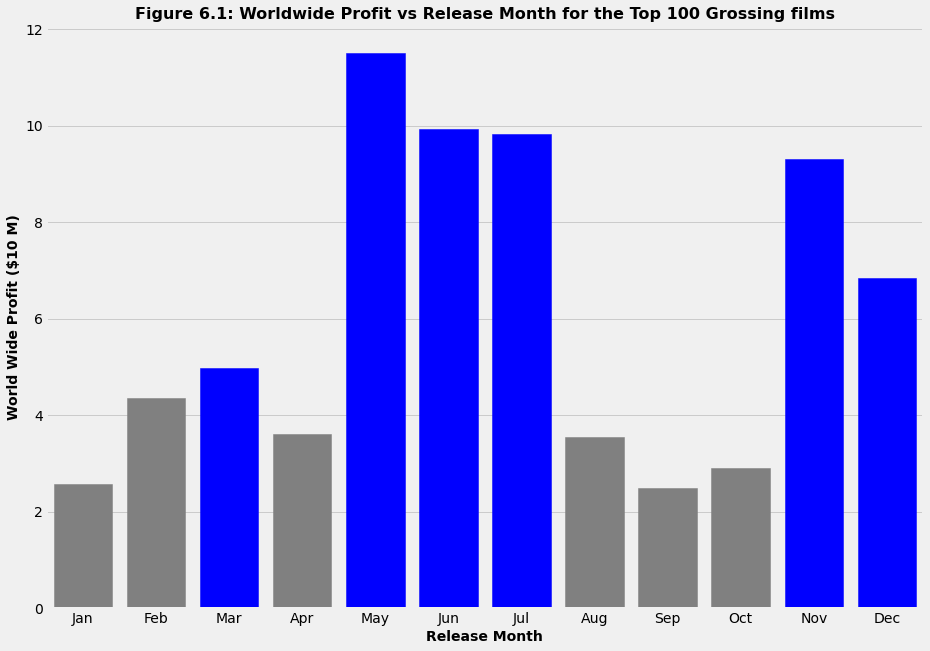

In [48]:
## Investigate the relationship between release_month and worldwide gross profit for the top 100 grossing films
# Set up theme
plt.style.use('fivethirtyeight')
# Set up Parameters
# Create plot variables
values = np.array(budgets_by_month_df.month_name)
labels = np.array(budgets_by_month_df.worldwide_profit)/10000000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = values, y = labels, palette = clrs)
ax.set_title("Figure 6.1: Worldwide Profit vs Release Month for the Top 100 Grossing films", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Release Month", fontsize = '14', weight = 'bold')
ax.set_ylabel("World Wide Profit ($10 M)", fontsize = '14', weight = 'bold');
for bar in ax.patches:
    if bar.get_height() < 4.5:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

In [49]:
# Print out the name of the column and the Pearson correlation of 
# the column most positively correlated with ROI 
correlation_values = filtered_movie_ROI_df.corr()["ROI"].sort_values()
print("The column with the most positive correlation with ROI is worldwide profit")

The column with the most positive correlation with ROI is worldwide profit


In [50]:
# Find correlations in filtered_movie_ROI dataframe
filtered_movie_ROI_df.corr().style.background_gradient(cmap="Blues")

,id,production_budget,domestic_gross,worldwide_gross,release_year,release_month,worldwide_profit,ROI,start_year,runtime_minutes
id,1.000000,-0.083084,-0.036307,-0.052061,0.010905,-0.023648,-0.039095,0.074785,0.010905,-0.003374
production_budget,-0.083084,1.000000,0.697481,0.776006,0.049715,-0.081066,0.650468,-0.038209,0.049715,0.319625
domestic_gross,-0.036307,0.697481,1.000000,0.943726,0.059030,-0.074364,0.938360,0.314164,0.059030,0.275829
worldwide_gross,-0.052061,0.776006,0.943726,1.000000,0.069500,-0.057440,0.983824,0.276026,0.069500,0.291216
release_year,0.010905,0.049715,0.059030,0.069500,1.000000,-0.053050,0.069573,0.064038,1.000000,0.072257
release_month,-0.023648,-0.081066,-0.074364,-0.057440,-0.053050,1.000000,-0.046147,-0.029893,-0.053050,0.113108
worldwide_profit,-0.039095,0.650468,0.938360,0.983824,0.069573,-0.046147,1.000000,0.343249,0.069573,0.259910
ROI,0.074785,-0.038209,0.314164,0.276026,0.064038,-0.029893,0.343249,1.000000,0.064038,0.035650
start_year,0.010905,0.049715,0.059030,0.069500,1.000000,-0.053050,0.069573,0.064038,1.000000,0.072257
runtime_minutes,-0.003374,0.319625,0.275829,0.291216,0.072257,0.113108,0.259910,0.035650,0.072257,1.000000


In [51]:
# Rough filter of prior correlation investigating dataframe
new_filtered_movie_ROI_df = filtered_movie_ROI_df[filtered_movie_ROI_df["production_budget"] >= 175000000]
new_filtered_movie_ROI_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,release_month,worldwide_profit,ROI,start_year,runtime_minutes
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,49.18,213320779.22,252017384.36,738321207.95,2014.56,6.56,525000428.73,249.54,2014.56,127.49
std,30.72,45556911.60,157474126.63,400694787.86,2.55,2.81,392402013.93,180.81,2.55,18.95
min,2.00,175000000.00,38362475.00,139630336.00,2010.00,2.00,-200237650.00,-57.21,2010.00,93.00
25%,21.00,180000000.00,144840419.00,393151347.00,2013.00,5.00,208541369.00,110.23,2013.00,113.00
50%,51.00,200000000.00,229024295.00,743588329.00,2015.00,6.00,537890267.00,240.24,2015.00,130.00
75%,77.00,225000000.00,334191110.00,1025491110.00,2017.00,7.00,809439099.00,388.13,2017.00,141.00
max,100.00,410600000.00,700059566.00,2048134200.00,2019.00,12.00,1748134200.00,699.33,2019.00,169.00


In [52]:
# Look at the filtered_movie_ROI dataframe
filtered_movie_ROI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1531
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1369 non-null   int64  
 1   movie              1369 non-null   object 
 2   production_budget  1369 non-null   int64  
 3   domestic_gross     1369 non-null   int64  
 4   worldwide_gross    1369 non-null   int64  
 5   release_year       1369 non-null   int64  
 6   release_month      1369 non-null   int64  
 7   worldwide_profit   1369 non-null   int64  
 8   ROI                1369 non-null   float64
 9   movie_id           1369 non-null   object 
 10  primary_title      1369 non-null   object 
 11  original_title     1369 non-null   object 
 12  start_year         1369 non-null   int64  
 13  runtime_minutes    1369 non-null   float64
 14  genres             1369 non-null   object 
 15  multi_genre        1369 non-null   object 
dtypes: float64(2), int64(8),

In [53]:
# Rough filter of prior correlation investigating dataframe upper limit
new_filtered_movie_ROI_df = new_filtered_movie_ROI_df[new_filtered_movie_ROI_df["production_budget"] <= 250000000]
new_filtered_movie_ROI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 140 to 1401
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 66 non-null     int64  
 1   movie              66 non-null     object 
 2   production_budget  66 non-null     int64  
 3   domestic_gross     66 non-null     int64  
 4   worldwide_gross    66 non-null     int64  
 5   release_year       66 non-null     int64  
 6   release_month      66 non-null     int64  
 7   worldwide_profit   66 non-null     int64  
 8   ROI                66 non-null     float64
 9   movie_id           66 non-null     object 
 10  primary_title      66 non-null     object 
 11  original_title     66 non-null     object 
 12  start_year         66 non-null     int64  
 13  runtime_minutes    66 non-null     float64
 14  genres             66 non-null     object 
 15  multi_genre        66 non-null     object 
dtypes: float64(2), int64(8),

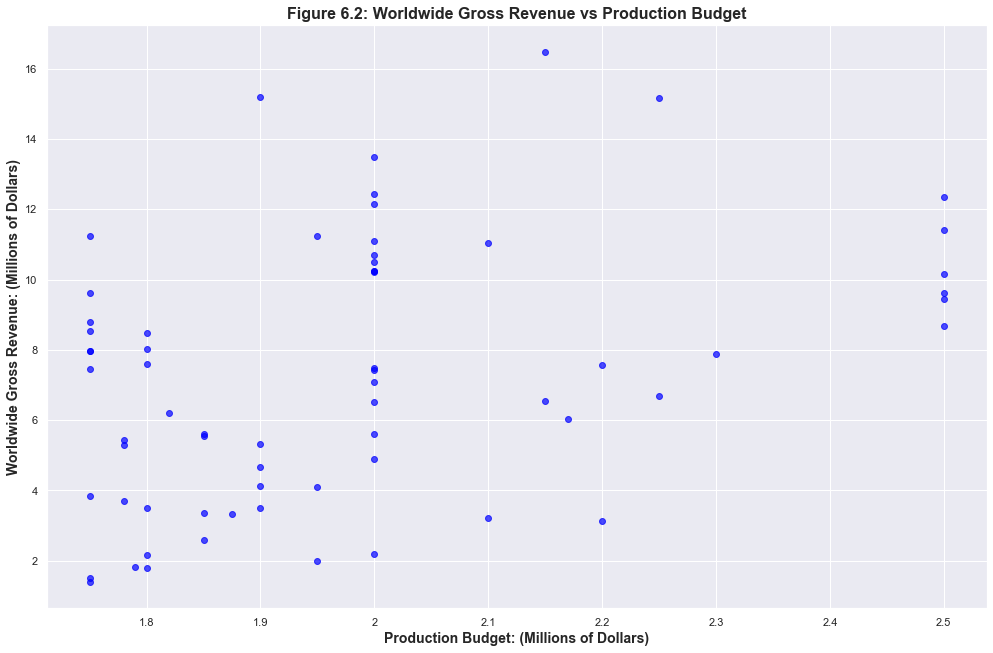

In [54]:
# Set up theme
sns.set_theme(style="darkgrid", palette="Set2")
x_values = new_filtered_movie_ROI_df.production_budget
y_values = new_filtered_movie_ROI_df.worldwide_gross

# Set up plot
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(x = x_values, y = "worldwide_gross", data = new_filtered_movie_ROI_df.head(100), alpha=0.7, color="blue")
ax.set_title("Figure 6.2: Worldwide Gross Revenue vs Production Budget", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Production Budget: (Millions of Dollars)", fontsize = 14, weight = 'bold')
ax.set_ylabel("Worldwide Gross Revenue: (Millions of Dollars)", fontsize = 14, weight = 'bold');
ax.ticklabel_format(style = "plain")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.4g}'.format(x/100000000)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.4g}'.format(x/100000000)))

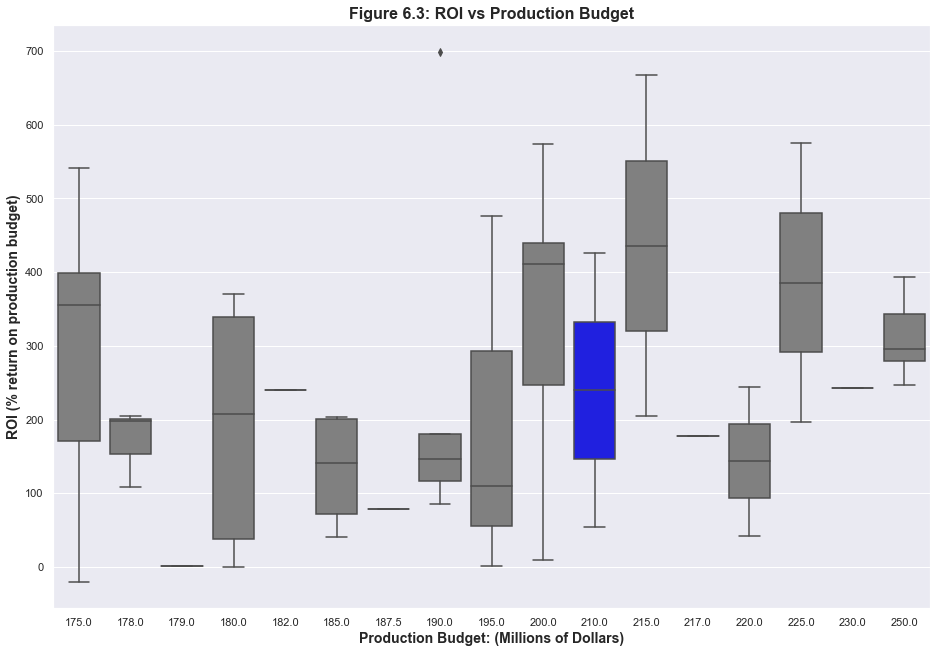

In [55]:
# Plot the relationship between production budget and ROI for films with production budgets between $175 and $250 Million.
# Set up theme
#sns.set_theme(style="darkgrid", palette="Set2")

# Create plot variables
data = new_filtered_movie_ROI_df.head(100)
values = np.array(data.ROI)
labels = np.array(data.production_budget)/1000000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.boxplot(x = labels, y = values, palette = clrs)
ax.set_title("Figure 6.3: ROI vs Production Budget", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Production Budget: (Millions of Dollars)", fontsize = '14', weight = 'bold')
ax.set_ylabel("ROI (% return on production budget)", fontsize = '14', weight = 'bold');

# Exploratory Data Analysis Q2

## Investigating the relationship between directors and WorldWide Profit

In [56]:
# Create a new dataframe that has worldwide_profit and directors
tn_and_imdb_full.info()
worldwide_profit_directors_df = tn_and_imdb_full.loc[:, ["director","primary_title", "production_budget",  "worldwide_profit","ROI"
                                         , "release_month", "start_year"]]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4656 entries, 0 to 4655
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4656 non-null   int64  
 1   movie               4656 non-null   object 
 2   production_budget   4656 non-null   int64  
 3   domestic_gross      4656 non-null   int64  
 4   worldwide_gross     4656 non-null   int64  
 5   release_year        4656 non-null   int64  
 6   release_month       4656 non-null   int64  
 7   worldwide_profit    4656 non-null   int64  
 8   ROI                 4656 non-null   float64
 9   movie_id            4656 non-null   object 
 10  primary_title       4656 non-null   object 
 11  original_title      4656 non-null   object 
 12  start_year          4656 non-null   int64  
 13  runtime_minutes     4656 non-null   float64
 14  genres              4656 non-null   object 
 15  multi_genre         4656 non-null   object 
 16  person

In [57]:
# Group by director and worldwide_profit
sorted_ww_profit_directors = worldwide_profit_directors_df.sort_values("worldwide_profit", ascending = False)
sorted_ww_profit_directors = sorted_ww_profit_directors.drop_duplicates()
top_100_movies_by_wwprofit = sorted_ww_profit_directors.head(100)

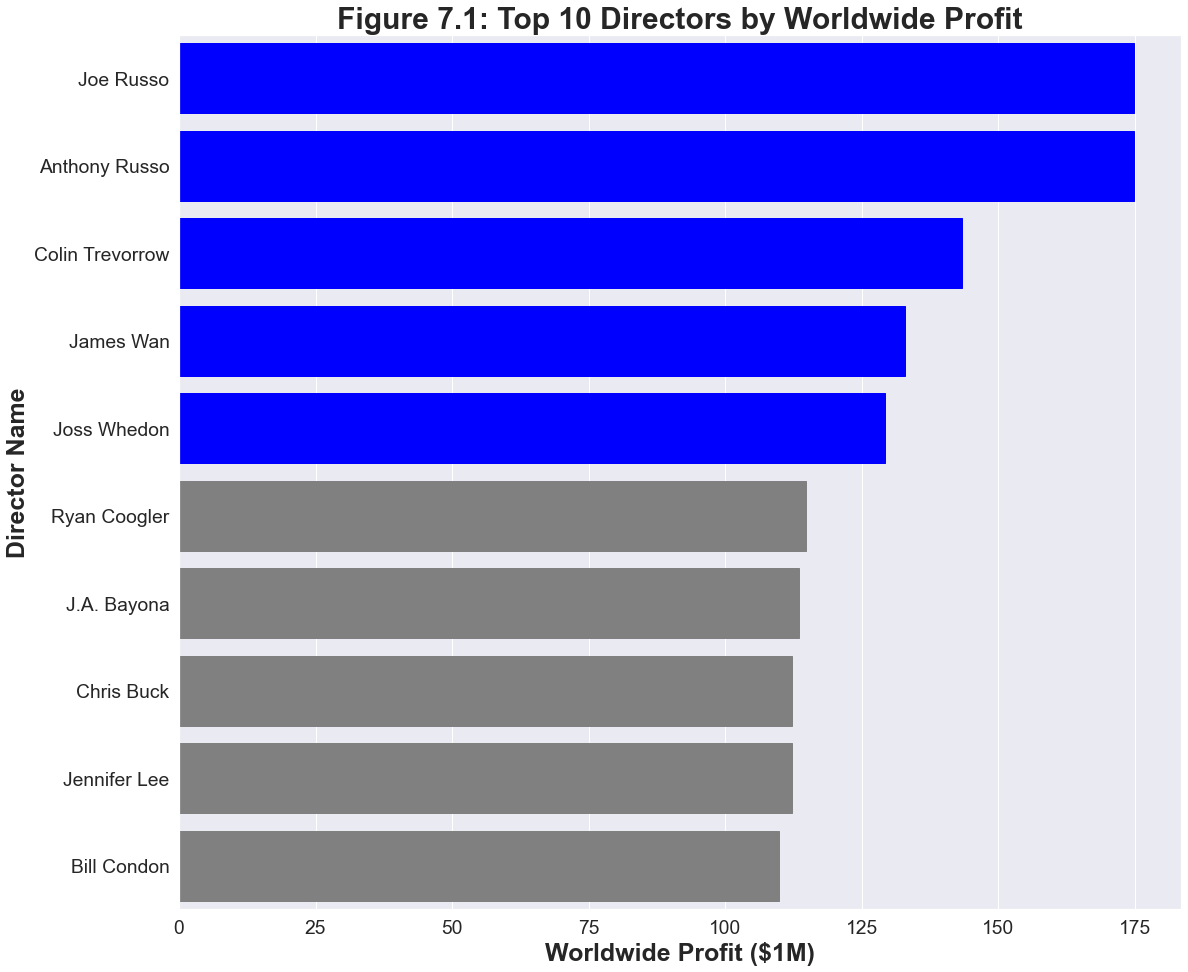

In [58]:
# Set up theme
# Set up Parameters
# Create plot variables
values = np.array(top_100_movies_by_wwprofit.head(10).director)
labels = np.array(top_100_movies_by_wwprofit.head(10).worldwide_profit)
sns.set(font_scale = 1.75)
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]
# Set up plot figure size
plt.figure(figsize =(16,15))
ax = sns.barplot(y = values, x = labels, palette = clrs)
ax.set_title("Figure 7.1: Top 10 Directors by Worldwide Profit", weight = 'bold').set_fontsize('30')
ax.set_ylabel("Director Name", fontsize = '25', weight = 'bold')
ax.set_xlabel("Worldwide Profit ($1M)", fontsize = '25', weight = 'bold');
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.4g}'.format(x/10000000)))
for bar in ax.patches:
    if bar.get_width() < 1150000000:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

# Exploratory Data Analysis Q3

## Which genres of movies make the most profit at the box office?

In [59]:
# Investigating the relationship between Genre and Worldwide Profit
# Create a smaller dataframe to investigate production cost by genre
genre_budget_df = tn_and_imdb.loc[:, ["multi_genre","primary_title", "production_budget",  "worldwide_profit","ROI"
                                         , "release_month"]]
genre_budget_df.head(20)


,multi_genre,primary_title,production_budget,worldwide_profit,ROI,release_month
0,"[Adventure, Animation, Comedy]",Norm of the North,18000000,12535660,69.64,1
1,"[Action, Crime, Thriller]",The Mechanic,42500000,33847393,79.64,1
2,"[Action, Comedy, Crime]",One for the Money,42000000,-5802779,-13.82,1
3,"[Action, Adventure, Crime]",Man on a Ledge,42000000,7621440,18.15,1
4,"[Action, Comedy, Crime]",Ride Along 2,40000000,84827316,212.07,1
5,"[Action, Comedy, Crime]",The Green Hornet,110000000,119155503,108.32,1
6,[Comedy],Dirty Grandpa,11500000,93578449,813.73,1
7,"[Comedy, Family, Fantasy]",Tooth Fairy,48000000,64610386,134.60,1
8,"[Action, Adventure, Drama]",The 5th Wave,38000000,73336398,192.99,1
9,[Comedy],Fifty Shades of Black,5000000,17113075,342.26,1


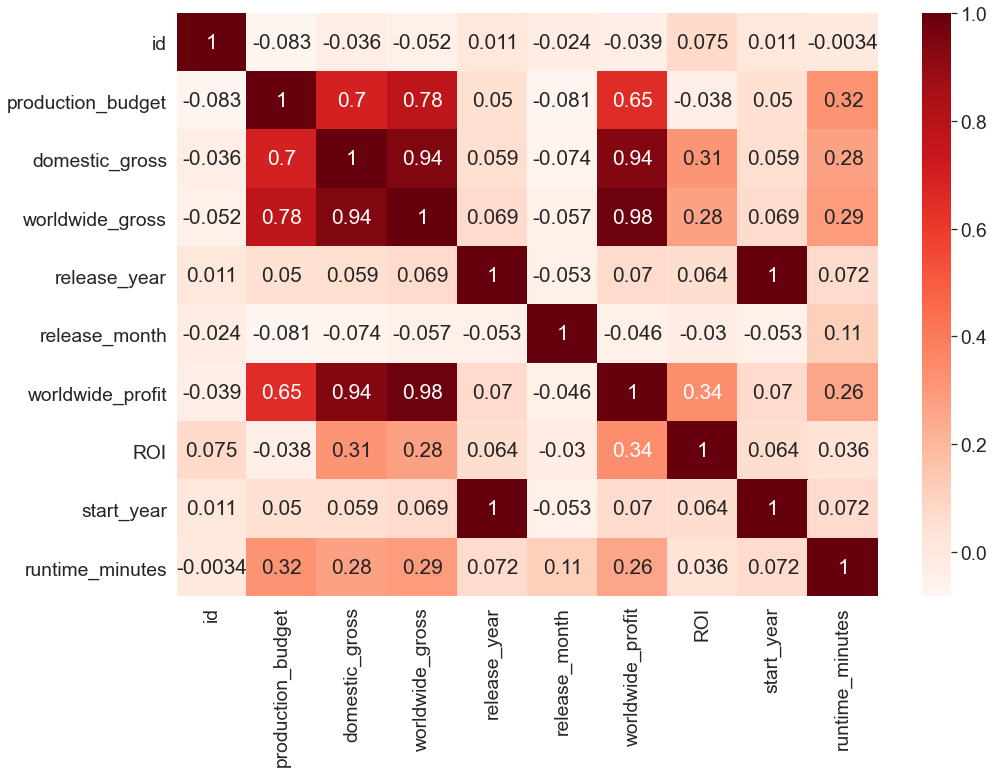

In [60]:
# Review correlations on filtered dataset
plt.figure(figsize =(14,10))
ax = sns.heatmap(filtered_movie_ROI_df.corr(), annot = True, cmap = "Reds")

In [61]:
# Explode genres 
exploded_genre_budget_df = genre_budget_df.explode("multi_genre")
exploded_genre_budget_df.head(20)

,multi_genre,primary_title,production_budget,worldwide_profit,ROI,release_month
0,Adventure,Norm of the North,18000000,12535660,69.64,1
0,Animation,Norm of the North,18000000,12535660,69.64,1
0,Comedy,Norm of the North,18000000,12535660,69.64,1
1,Action,The Mechanic,42500000,33847393,79.64,1
1,Crime,The Mechanic,42500000,33847393,79.64,1
1,Thriller,The Mechanic,42500000,33847393,79.64,1
2,Action,One for the Money,42000000,-5802779,-13.82,1
2,Comedy,One for the Money,42000000,-5802779,-13.82,1
2,Crime,One for the Money,42000000,-5802779,-13.82,1
3,Action,Man on a Ledge,42000000,7621440,18.15,1


In [62]:
# Group by multi_genre by production budget
grouped_genre_budget = exploded_genre_budget_df.groupby("multi_genre")["production_budget"].median()
grouped_genre_budget.head(20)

multi_genre
Action          57750000
Adventure      100000000
Animation       83500000
Biography       20000000
Comedy          25500000
Crime           28000000
Documentary      3000000
Drama           17500000
Family          40000000
Fantasy         60000000
History         25000000
Horror          10000000
Missing         10750000
Music           15000000
Musical         55000000
Mystery         12500000
Reality-TV       1000000
Romance         17000000
Sci-Fi          74000000
Sport           18000000
Name: production_budget, dtype: int64

In [63]:
# Create a dataframe from the series
grouped_genre_budget_df = grouped_genre_budget.to_frame(name = "production_budget").reset_index()
grouped_genre_budget_df.head(20)

,multi_genre,production_budget
0,Action,57750000
1,Adventure,100000000
2,Animation,83500000
3,Biography,20000000
4,Comedy,25500000
5,Crime,28000000
6,Documentary,3000000
7,Drama,17500000
8,Family,40000000
9,Fantasy,60000000


In [64]:
# Sort by Production Budget 
grouped_genre_budget_df.sort_values("production_budget", ascending = False)

,multi_genre,production_budget
1,Adventure,100000000
2,Animation,83500000
18,Sci-Fi,74000000
9,Fantasy,60000000
0,Action,57750000
14,Musical,55000000
8,Family,40000000
22,Western,35000000
5,Crime,28000000
4,Comedy,25500000


In [65]:
# Count unique elements in each column
exploded_genre_budget_df.nunique()

multi_genre            23
primary_title        1468
production_budget     260
worldwide_profit     1414
ROI                  1351
release_month          12
dtype: int64

In [66]:
# Sort the dataframe
exploded_genre_budget_df.sort_values("worldwide_profit", ascending = False)
exploded_genre_budget_df.head()

,multi_genre,primary_title,production_budget,worldwide_profit,ROI,release_month
0,Adventure,Norm of the North,18000000,12535660,69.64,1
0,Animation,Norm of the North,18000000,12535660,69.64,1
0,Comedy,Norm of the North,18000000,12535660,69.64,1
1,Action,The Mechanic,42500000,33847393,79.64,1
1,Crime,The Mechanic,42500000,33847393,79.64,1


In [67]:
# Group by multi_genre by production budget
grouped_genre_ww_profit = exploded_genre_budget_df.groupby("multi_genre")["worldwide_profit"].median()

In [68]:
# Create a dataframe from the series
grouped_genre_ww_profit_df = grouped_genre_ww_profit.to_frame(name = "worldwide_profit").reset_index()
grouped_genre_ww_profit_df.head()

,multi_genre,worldwide_profit
0,Action,51387479.50
1,Adventure,128314513.00
2,Animation,194139928.50
3,Biography,16983758.50
4,Comedy,28527406.00


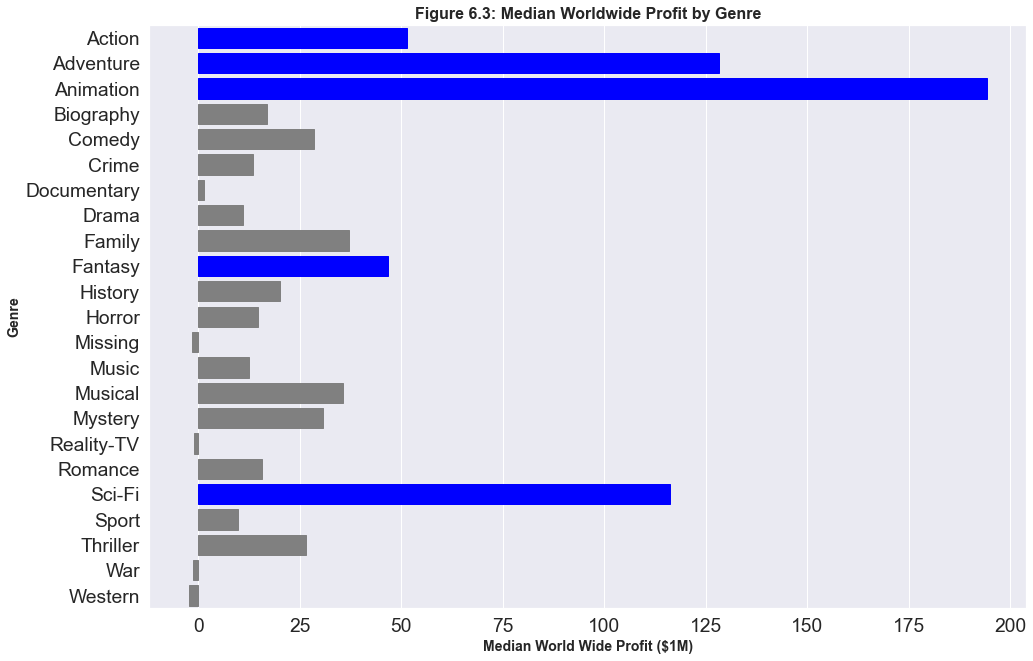

In [69]:
# Set up theme
#sns.set_theme(style="darkgrid", palette="Set2")
# Set up Parameters
# Create plot variables
values = np.array(grouped_genre_ww_profit_df.multi_genre)
labels = np.array(grouped_genre_ww_profit_df.worldwide_profit)/1000000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(y = values, x = labels, palette = clrs)
ax.set_title("Figure 6.3: Median Worldwide Profit by Genre", weight = 'bold').set_fontsize('16')
ax.set_ylabel("Genre", fontsize = '14', weight = 'bold')
ax.set_xlabel("Median World Wide Profit ($1M)", fontsize = '14', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 45:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

In [70]:
# Group by multi_genre by production budget
month_grouped_genre_median_ww_profit = exploded_genre_budget_df.groupby(["release_month","multi_genre"])["worldwide_profit"].median().unstack().transpose()

In [71]:
# Look at first five rows of the grouped dataframe
month_grouped_genre_median_ww_profit.head()

release_month,1,2,3,4,5,6,7,8,9,10,11,12
multi_genre,,,,,,,,,,,,
Action,36118378.00,80378084.00,90808837.00,55275291.00,119825506.00,167194805.00,111115739.50,32295262.00,30335864.00,48056457.00,37255916.00,-600000.00
Adventure,51126600.00,101249630.00,134455704.50,222908183.00,299326618.00,265522281.00,168902025.00,61600183.50,52341726.00,24588758.00,227046332.50,124774690.00
Animation,92529966.00,237013181.00,190402163.00,131618089.50,279327887.00,506587299.50,457914642.50,19993255.50,123522354.00,47651543.00,205518671.00,142146323.00
Biography,-3317305.00,26096200.00,-1534155.00,29158652.00,-2777427.50,-2417804.00,-8567177.00,14371191.50,26492104.00,1752387.00,45911600.50,37460543.00
Comedy,51120275.50,49911903.00,19730861.50,33014010.50,51560777.00,35672764.00,72378492.00,27000339.00,17621449.00,1752387.00,65945357.00,11414683.50


In [78]:
# Information of the grouped dataframe

month_grouped_genre_median_ww_profit = month_grouped_genre_median_ww_profit.astype(int)

In [79]:
# Identify best genre for each month

month_grouped_genre_median_ww_profit.fillna(0, inplace = True)
month_grouped_genre_median_ww_profit.style.highlight_max(color = "royalblue", axis = 0)

release_month,1,2,3,4,5,6,7,8,9,10,11,12
multi_genre,,,,,,,,,,,,
Action,36118378,80378084,90808837,55275291,119825506,167194805,111115739,32295262,30335864,48056457,37255916,-600000
Adventure,51126600,101249630,134455704,222908183,299326618,265522281,168902025,61600183,52341726,24588758,227046332,124774690
Animation,92529966,237013181,190402163,131618089,279327887,506587299,457914642,19993255,123522354,47651543,205518671,142146323
Biography,-3317305,26096200,-1534155,29158652,-2777427,-2417804,-8567177,14371191,26492104,1752387,45911600,37460543
Comedy,51120275,49911903,19730861,33014010,51560777,35672764,72378492,27000339,17621449,1752387,65945357,11414683
Crime,13543388,36742138,21444133,7883237,28041566,3062896,21068890,13836080,23785322,3775822,17425450,-73395
Documentary,0,135260488,20667389,-2313312,1495262,-1239832,884276,4856688,-341867,4049171,13257261,1593614
Drama,13618920,27362398,12107621,6594052,26721826,420962,11477345,14660323,7846438,4383713,17221661,11094299
Family,18752858,-14731320,70279266,4340177,134861276,31777043,57986320,15138912,59068724,8168633,37393899,74829625


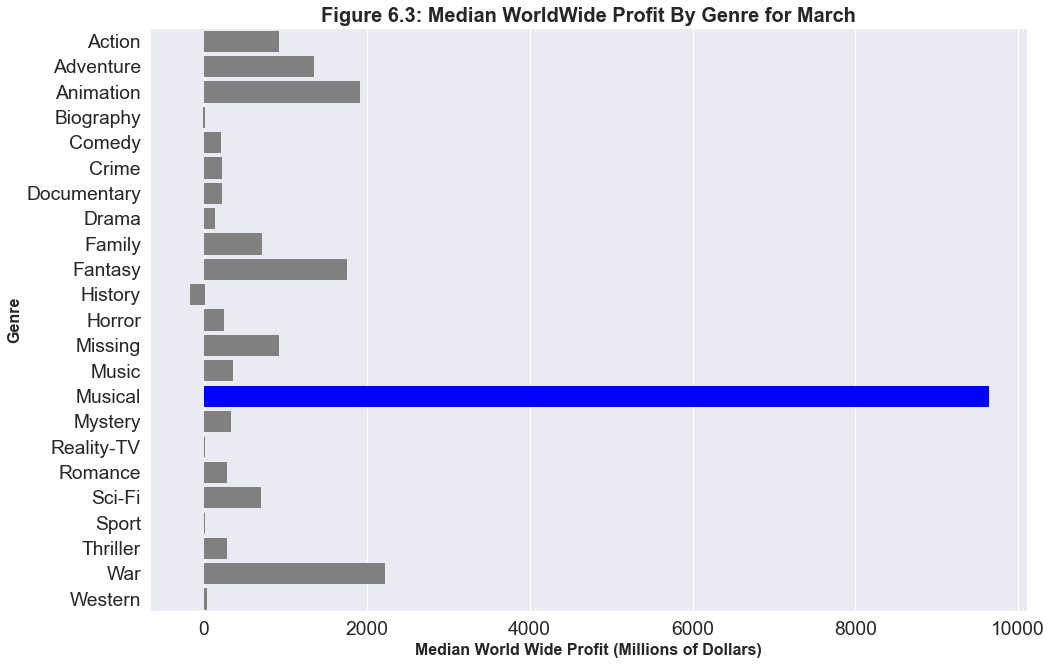

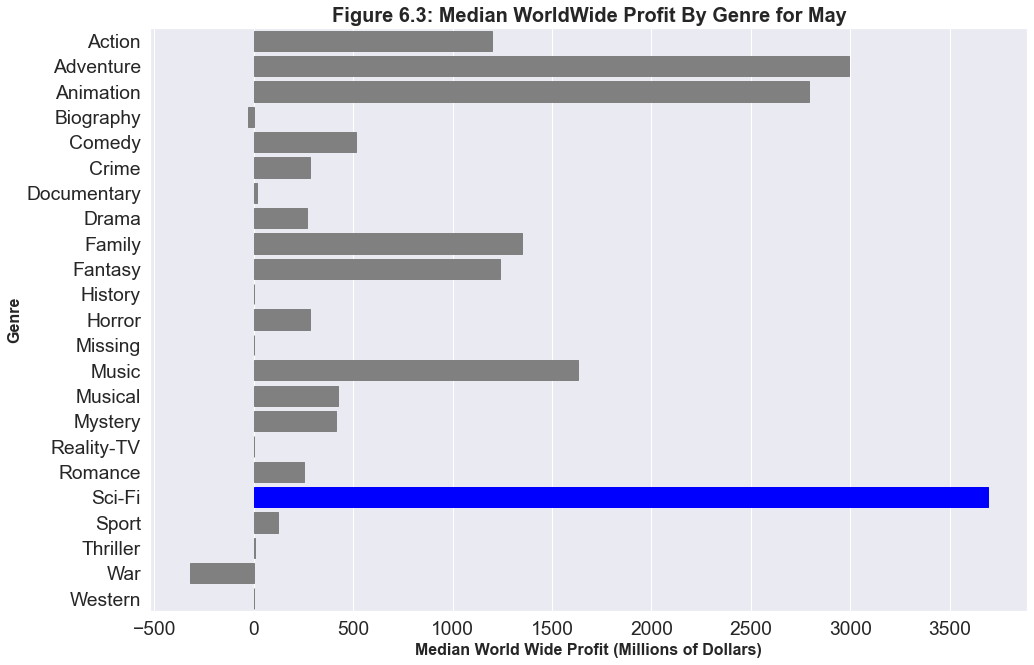

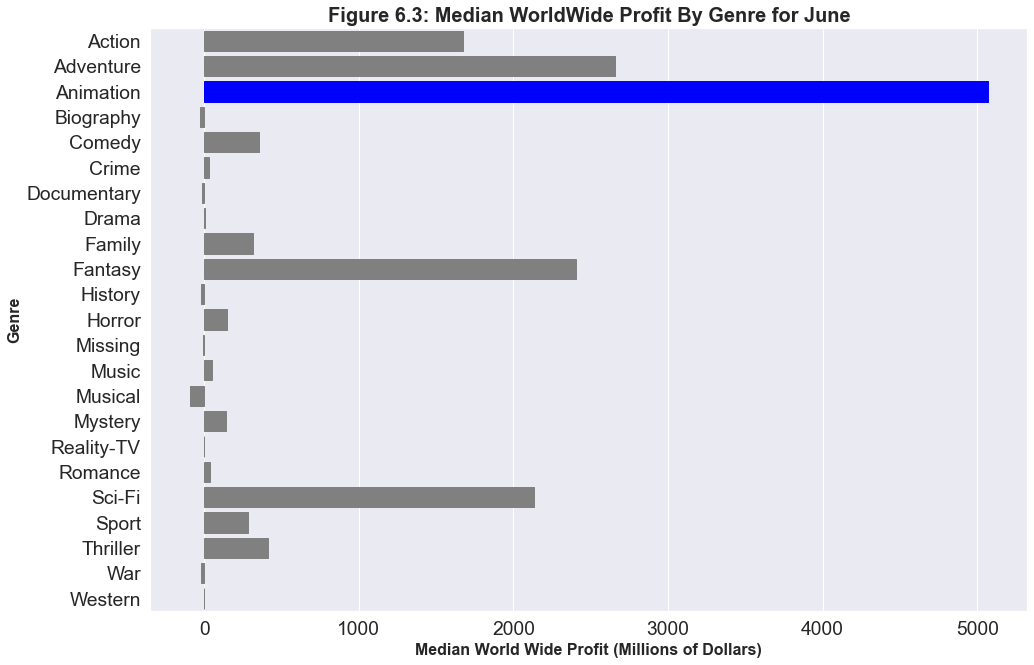

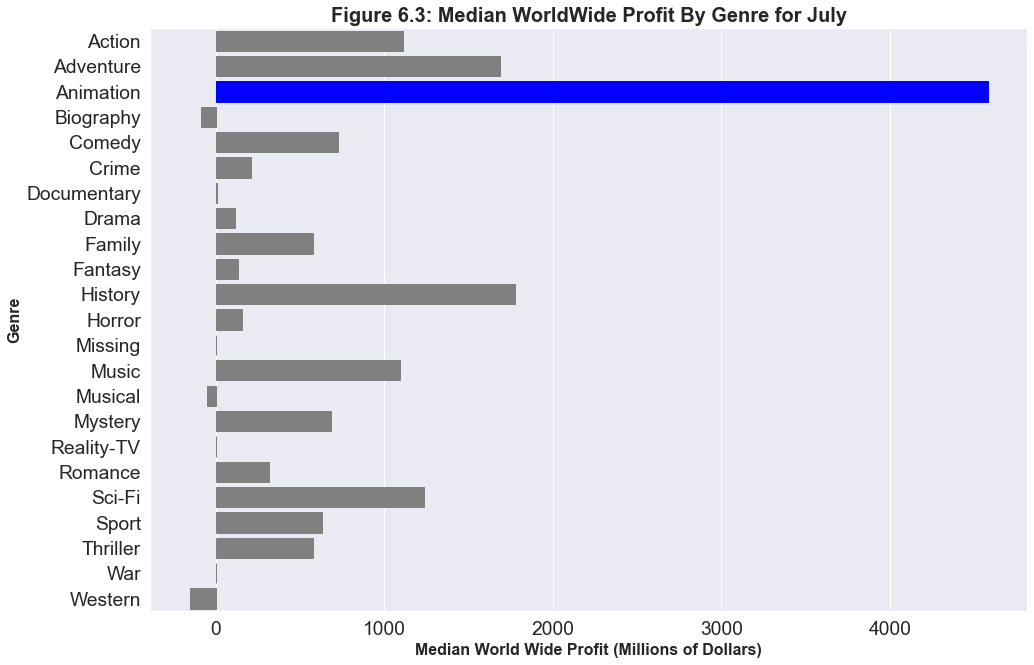

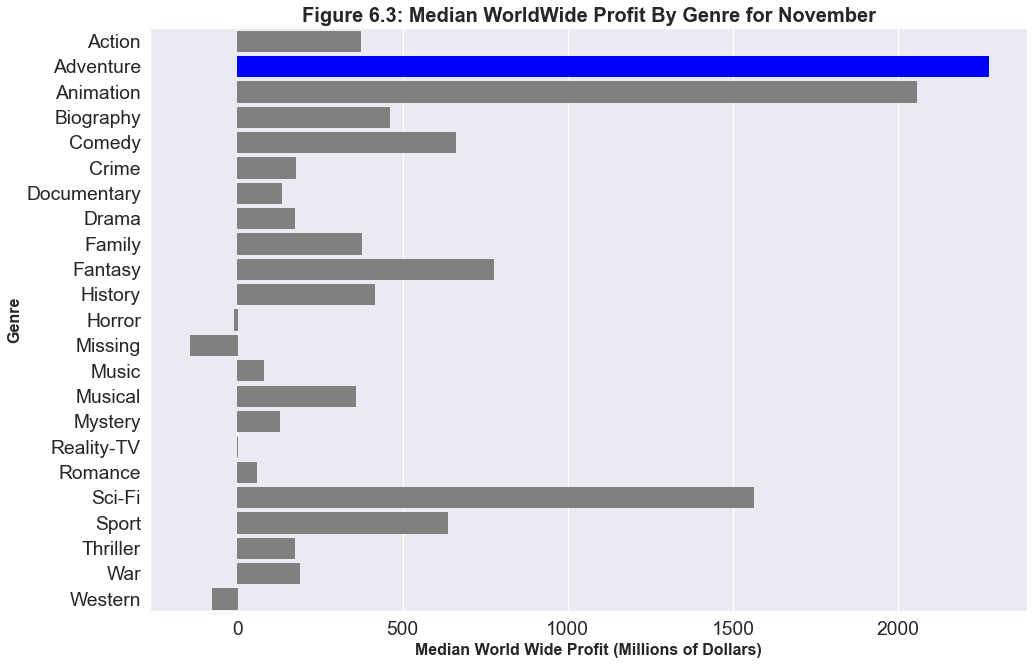

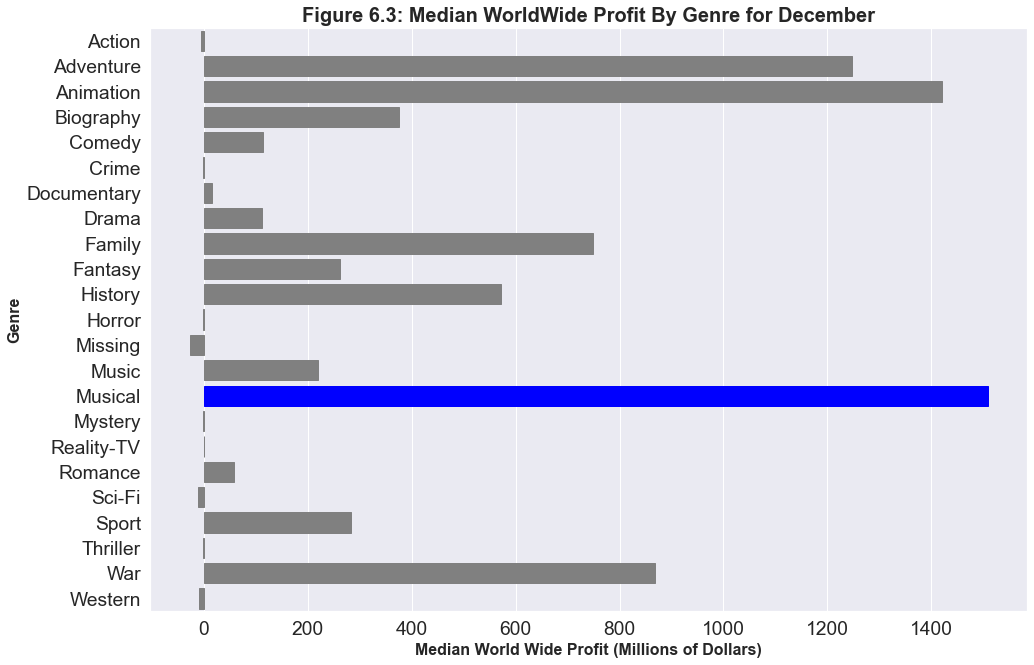

In [74]:
# Setup plot variales
x = month_grouped_genre_median_ww_profit.index
march =  month_grouped_genre_median_ww_profit[3]/100000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = march, y = x ,palette = clrs )
ax.set_title("Figure 6.3: Median WorldWide Profit By Genre for March", weight = 'bold').set_fontsize('20')
ax.set_ylabel("Genre", fontsize = '16', weight = 'bold')
ax.set_xlabel("Median World Wide Profit (Millions of Dollars)", fontsize = '16', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 2500:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

        
x = month_grouped_genre_median_ww_profit.index
may =  month_grouped_genre_median_ww_profit[5]/100000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = may, y = x ,palette = clrs )
ax.set_title("Figure 6.3: Median WorldWide Profit By Genre for May", weight = 'bold').set_fontsize('20')
ax.set_ylabel("Genre", fontsize = '16', weight = 'bold')
ax.set_xlabel("Median World Wide Profit (Millions of Dollars)", fontsize = '16', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 3000:
        bar.set_color('grey')
    else:
        bar.set_color('blue')
        
x = month_grouped_genre_median_ww_profit.index
june =  month_grouped_genre_median_ww_profit[6]/100000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = june, y = x ,palette = clrs )
ax.set_title("Figure 6.3: Median WorldWide Profit By Genre for June", weight = 'bold').set_fontsize('20')
ax.set_ylabel("Genre", fontsize = '16', weight = 'bold')
ax.set_xlabel("Median World Wide Profit (Millions of Dollars)", fontsize = '16', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 3000:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

x = month_grouped_genre_median_ww_profit.index
july =  month_grouped_genre_median_ww_profit[7]/100000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = july, y = x ,palette = clrs )
ax.set_title("Figure 6.3: Median WorldWide Profit By Genre for July", weight = 'bold').set_fontsize('20')
ax.set_ylabel("Genre", fontsize = '16', weight = 'bold')
ax.set_xlabel("Median World Wide Profit (Millions of Dollars)", fontsize = '16', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 3000:
        bar.set_color('grey')
    else:
        bar.set_color('blue')
        
        
x = month_grouped_genre_median_ww_profit.index
november =  month_grouped_genre_median_ww_profit[11]/100000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = november, y = x ,palette = clrs )
ax.set_title("Figure 6.3: Median WorldWide Profit By Genre for November", weight = 'bold').set_fontsize('20')
ax.set_ylabel("Genre", fontsize = '16', weight = 'bold')
ax.set_xlabel("Median World Wide Profit (Millions of Dollars)", fontsize = '16', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 2200:
        bar.set_color('grey')
    else:
        bar.set_color('blue')
        
x = month_grouped_genre_median_ww_profit.index
december =  month_grouped_genre_median_ww_profit[12]/100000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = december, y = x ,palette = clrs )
ax.set_title("Figure 6.3: Median WorldWide Profit By Genre for December", weight = 'bold').set_fontsize('20')
ax.set_ylabel("Genre", fontsize = '16', weight = 'bold')
ax.set_xlabel("Median World Wide Profit (Millions of Dollars)", fontsize = '16', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 1450:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

# Insights
***

From Figure 6.2 the most ideal production cost is **210 million dollars**. In this figure ROI is calculated by dividing worlwide profit by the production cost and multiplying by 100.
\begin{equation*}
ROI  =\frac{\text{worldwide profit}}{\text{production budget}} * 100
\end{equation*}

In Figure 8.1 I looked at the relationship between production budget and worlwide gross for the top 100 grossing films in my dataset. As a business, we want to get the largest revenue while minimizing production costs. From figure 2.1 I noticed that while the median production cost is around 20 million dollars, __production costs of around 200 million dollars have the most consistent worldwide profit__.
In fact more films that had production budgets of over 100 million but less than 250 million dollars saw worldwide gross revenue of 500 million dollars or more than any other movies in the top 100 highest grossing movies in my dataset. While movies over 400 million dollars seem to generate at least the same amount of worldwide revenue as the production costs, the number of movies in this category seem to be outliers. 

# Recommendations
***